<h1>Cleaning Data in Python</h1>



<h3>1-100 Bad Data Principle</h3>
<p>Every dollar spent cleaning bad data statistically prevents around USD 100 in down-the-line costs.</p>



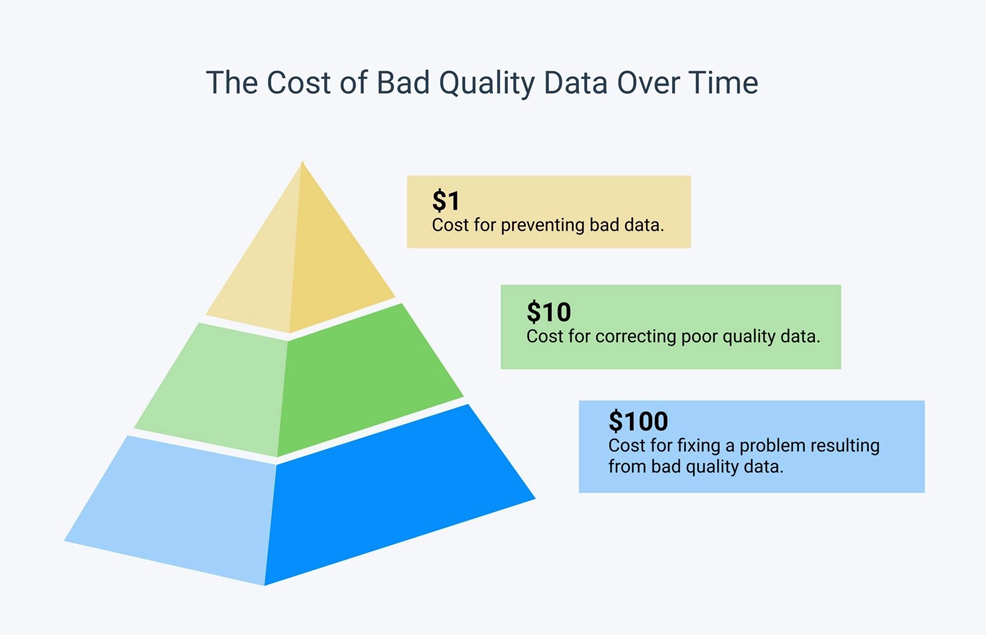

<h3>As Raúl Garreta, puts it,</h3>

<h4>“If your downstream process receives garbage as input data, the quality of your results will also be bad.”</h4>

<h1>We will implement the phases of Data Cleaning as follows.</h1>

<ol>
    <li>Diagnostic Analysis for Data Cleaning</li>
    <li>Data Cleaning Implementation</li>
    <li>Final Inspection of Dataframe</li>
</ol>

<h2>Importing Libraries </h2>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


<h2>Phase 1: DIAGNOSTIC ANALYSIS FOR DATA CLEANING</h2>

<h3>Common Data Problems</h3>

<ol>
<li>Inconsistent column names</li>
<li>Extracting more information from your dataset to get more variables.
<li>Check the data type of each column.
<li>
    Missing Data
<ul>Dealing with Missing Values (NaN/Null/Empty Values)</ul> 
<ul>Look at the proportion of missing data.</ul>
</li>
<li>Outliers</li>
<li>Duplicate rows</li>
<li>Check the unique values of columns.</li>
<li>
    Untidy
    <ul>If you have columns of strings, check for trailing whitespaces.</ul>
    <ul>Need to process columns</ul>
</li>
<li>Column types can signal unexpected data values</li>
</ol>

<h1>1. Load your Data</h1>

In [93]:
amazon = pd.read_csv('Amazon Sale Report.csv', low_memory=False)
amazon.head()
#Check the data types of the columns
#print(amazon.dtypes)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


<h1>2. Visually Inspect</h1>

In [94]:
amazon.head(10)
#but when tested amazon.head() shows top 5 rows so does amazon.head(5), amazon.head(10) shows top 10 rows

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


<h2> .tail() shows the last rows in the dataset</h2>

In [95]:
#.tail() shows the last rows in the dataset
amazon.tail(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


<h2>.columns shows the name of columns in the dataset</h2>

In [96]:
#.columns shows the name of columns in the dataset
amazon.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

<h2>.shape shows the number of rows and columns in a dataset</h2>

In [97]:
amazon.shape
# here output is (128975, 24) means 128975 rows & 24 columns

(128975, 24)

<h1>3. Exploratory Data Analysis</h1>

<h2>.info shows the number columns, columns name, non null values and Data type of each column of the dataset</h2>

In [98]:
#.info() command shows the datatypes and non-null values for each column in data set
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

<h2>Frequency Counts</h2>

<p>Check the unique values in each columns</p>


In [99]:
amazon['ship-city'].value_counts(dropna=False)

BENGALURU                                      11217
HYDERABAD                                       8074
MUMBAI                                          6126
NEW DELHI                                       5795
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: ship-city, Length: 8956, dtype: int64

In [100]:
amazon['ship-state'].value_counts(dropna=False)

MAHARASHTRA      22260
KARNATAKA        17326
TAMIL NADU       11483
TELANGANA        11330
UTTAR PRADESH    10638
                 ...  
Puducherry           1
APO                  1
PB                   1
orissa               1
AR                   1
Name: ship-state, Length: 70, dtype: int64

In [101]:
amazon.Status.value_counts(dropna=False)

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

<p>amazon.value_counts(dropna=False) can be done to know all the unique values in each columns since it is a large dataset so it would be discrete</p>

In [102]:
amount = amazon['Amount'].value_counts(dropna=False, sort=True)
amount

NaN        7795
399.00     5442
771.00     2797
735.00     2436
0.00       2343
           ... 
611.43        1
757.14        1
1797.00       1
1764.00       1
639.00        1
Name: Amount, Length: 1411, dtype: int64

In [103]:
qty = amazon['Qty'].value_counts(dropna=False, sort=False)
qty

0      12807
1     115780
2        341
15         1
3         32
9          1
13         1
5          2
4          9
8          1
Name: Qty, dtype: int64

<h1>4. Checking number of duplicate rows in a dataset</h1>

Number of reapeated columns and rows in dataframe

In [104]:
print(amazon.duplicated().value_counts())

False    128975
dtype: int64


No duplicates rows were found in a dataset

<h1> 5. Summary Statistics </h1>

<ol>
<li>Numeric columns</li>
<li>Outliers</li>
<li>Considerably higher or lower</li> 
<li>Require further investigation</li>
</ol>

In [105]:
amazon.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


<h1>6. Data Visulization</h1>

<ol>
    <li>Great way to spot outliers and obvious errors</li>
    <li>More than just looking for patterns</li>
    <li>Plan data cleaning steps</li>
</ol>

<h3>Bar plots and histograms</h3>

<ol>
<li>Bar plots for discrete data counts</li>
<li>Histograms for continuous data counts</li> 
<li>Look at frequencies</li>
</ol>

<h2>As you can see that.</h2>
<ol>
    <li>Not all outliers are bad data points.</li>
    <li>Some can be an error, but others are valid values.</li>
</ol>

<h2>Checking Outliners visually</h2>

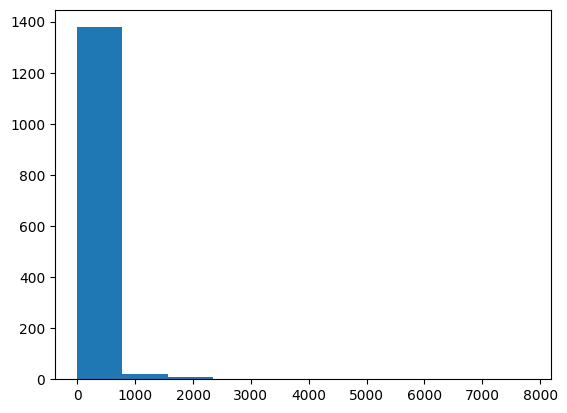

In [106]:
plt.hist(amount)
plt.show()

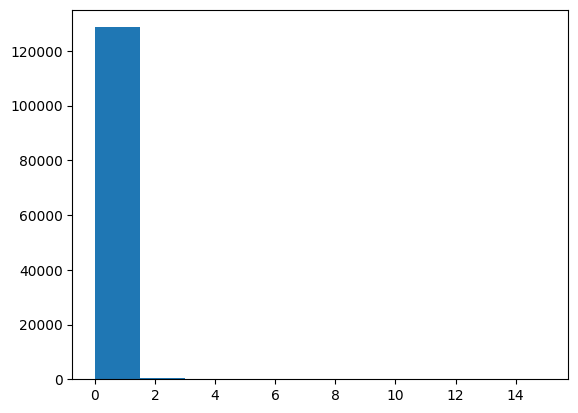

In [107]:
plt.hist(amazon['Qty'])
plt.show()

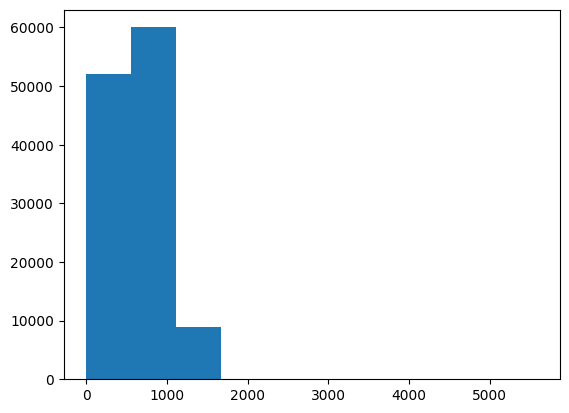

In [108]:
plt.hist(amazon['Amount'])
plt.show()

In [109]:
amazon[amazon['Amount'] > 900]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
32,32,404-9632124-1107550,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0011,J0011-LCD-M,Set,...,INR,1233.0,VISAKHAPATNAM,ANDHRA PRADESH,530016.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
43,43,408-3478480-0881162,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET360,SET360-KR-NP-M,Set,...,INR,1126.0,LUCKNOW,UTTAR PRADESH,226017.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
46,46,408-3917043-5314763,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-L,Set,...,INR,1146.0,ONGOLE,ANDHRA PRADESH,523001.0,IN,NaN,False,NaN,NaN
52,52,408-7138000-9728362,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET282,SET282-KR-PP-M,Set,...,INR,1033.0,dimapur,NAGALAND,797112.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
66,66,405-4461562-9113959,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET333,SET333-KR-DPT-XXL,Set,...,INR,909.0,RANCHI,JHARKHAND,834004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128956,128956,403-0816822-3188305,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NW032,NW032-ST-CP-XXXL,Set,...,INR,992.0,CHENNAI,TAMIL NADU,600042.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128957,128957,402-8261465-0622733,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,...,INR,1349.0,RANCHI,JHARKHAND,834002.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128966,128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,...,INR,1132.0,CHENNAI 600042,TAMIL NADU,600042.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


<p>The graphs of Amount and Qty illustrate from histogram plots that there are no outliners in dataset and those few minor data points are also valid.
It is necessary to identify outliners in the dataframse as it can effect unaccurate results from analysis.</p>


<h1>7. Checking Empty/NaN/Null Values in Dataframe</h1>

In [110]:
# Checking null values in a single column.
amazon['ship-city'].isnull().sum()

33

In [111]:
amazon['ship-state'].isnull().sum()

33

In [112]:
#Checking null values in entire dataset.
amazon.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

<h1>PHASE 2: DATA CLEANING IMPLEMENTATION</h1>

<h2>Prepare and clean data</h2>

There may be times we want to convert from one type to another
Numeric columns can be strings, or vice versa



<h2>String Manipulation</h2>

<b>
<ol>
    <li>Much of data cleaning involves string manipulation.</li>
    <li>Most of the world’s data is unstructured text.</li>
    <li>Also have to do string manipulation to make  datasets consistent with one another.</li>
</ol>
</b>

<h2>Duplicates and Missing Data</h2>

<h2>STEP 1. Drop Duplicates</h2>
Removing duplicat rows from Data Frame

In [113]:
amazon.nunique()

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [114]:
amazon.apply(pd.unique)

index                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5

In [115]:
before_remove_duplicates = len(amazon)
print(before_remove_duplicates)

128975


In [116]:
x = amazon.drop_duplicates(inplace = True)
print(x)

None


In [117]:
after_remove_duplicates = len(amazon)
duplicate_rows_removed = before_remove_duplicates - after_remove_duplicates
print(f'{duplicate_rows_removed} duplicate rows have been removed! \nThe Dataset now has {after_remove_duplicates} rows.')

0 duplicate rows have been removed! 
The Dataset now has 128975 rows.


<h2>2. Remove Missing Data / Null values</h2>

For removing null values in dataframe there are certain ways to implement as follows.

<ol>
    <li>Leave as-is</li>  
    <li>Drop them</li>
    <li>Fill missing value</li>
</ol>

<h2>Dropping Missing Values</h2>

<h2>Fill missing values with .fillna()</h2>
<ol>
    <li>Fill with provided value</li>
    <li>Use a summary statistic</li>
</ol>

In [118]:
#Count missing values of eack columns
amount_null_value = amazon['Amount'].isnull().sum()
amount_null_value

7795

In [119]:
amazon['Amount'].fillna(0, inplace = True)

In [120]:
amazon['promotion-ids'].fillna('no promotion', inplace = True)

In [121]:
amazon['Courier Status'].fillna('unknown', inplace = True)
amazon['ship-city'].fillna('unknown', inplace = True)
amazon['ship-state'].fillna('unknown', inplace = True)
amazon['ship-postal-code'].fillna('unknown', inplace = True)

In [122]:
#drop columns with nan values
amazon.drop(columns = ['Unnamed: 22','fulfilled-by','ship-country', 'currency','Sales Channel '], inplace = True)

<h2>Fill missing values with a test statistic</h2>
<ol>
    <li>Careful when using test statistics to fill.</li>
    <li>Have to make sure the value you are filling in makes sense.</li>  
    <li>The median is a better statistic in the presence of outliers.</li>
</ol>

In [123]:
mapper = {'Order ID':'orderID', 'Date':'date', 'Status':'shipStatus','Fullfilment':'fullfilment', 'ship-service-level':'serviceLevel', 'Style':'style', 'SKU':'sku', 'Category':'productCategory', 'Size':'size', 'ASIN':'asin', 'Courier Status':'courierShipStatus', 'Qty':'orderQuantity', 'Amount':'orderAmount (INR)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 'promotion-ids':'promotion','B2B':'customerType' }
amazon.rename(columns = mapper, inplace = True)
amazon.head()

,index,orderID,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False


In [124]:
amazon['customerType'].replace([True, False], ['business', 'consumer'], inplace = True)
amazon.head()

,index,orderID,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer


<h2>Cheking the null values in data set</h2>

In [125]:
#the any() function combined with isnull() returns all of the rows that have a null value.
null_set = amazon[amazon.isnull().any(axis = 1)]
null_set.head()

,index,orderID,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType


In [126]:
amazon.isnull().sum()

index                0
orderID              0
date                 0
shipStatus           0
Fulfilment           0
serviceLevel         0
style                0
sku                  0
productCategory      0
size                 0
asin                 0
courierShipStatus    0
orderQuantity        0
orderAmount (INR)    0
city                 0
state                0
zip                  0
promotion            0
customerType         0
dtype: int64

No null row exsists

In [127]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              128975 non-null  int64  
 1   orderID            128975 non-null  object 
 2   date               128975 non-null  object 
 3   shipStatus         128975 non-null  object 
 4   Fulfilment         128975 non-null  object 
 5   serviceLevel       128975 non-null  object 
 6   style              128975 non-null  object 
 7   sku                128975 non-null  object 
 8   productCategory    128975 non-null  object 
 9   size               128975 non-null  object 
 10  asin               128975 non-null  object 
 11  courierShipStatus  128975 non-null  object 
 12  orderQuantity      128975 non-null  int64  
 13  orderAmount (INR)  128975 non-null  float64
 14  city               128975 non-null  object 
 15  state              128975 non-null  object 
 16  zi

<h2>3. Converting Datatypes</h2>

<h2>Checking Data Types from Data Frames</h2>

In [128]:
print(amazon.dtypes)

index                  int64
orderID               object
date                  object
shipStatus            object
Fulfilment            object
serviceLevel          object
style                 object
sku                   object
productCategory       object
size                  object
asin                  object
courierShipStatus     object
orderQuantity          int64
orderAmount (INR)    float64
city                  object
state                 object
zip                   object
promotion             object
customerType          object
dtype: object


In [129]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              128975 non-null  int64  
 1   orderID            128975 non-null  object 
 2   date               128975 non-null  object 
 3   shipStatus         128975 non-null  object 
 4   Fulfilment         128975 non-null  object 
 5   serviceLevel       128975 non-null  object 
 6   style              128975 non-null  object 
 7   sku                128975 non-null  object 
 8   productCategory    128975 non-null  object 
 9   size               128975 non-null  object 
 10  asin               128975 non-null  object 
 11  courierShipStatus  128975 non-null  object 
 12  orderQuantity      128975 non-null  int64  
 13  orderAmount (INR)  128975 non-null  float64
 14  city               128975 non-null  object 
 15  state              128975 non-null  object 
 16  zi

<h2>Datetime data loaded as String</h2>
<p><b>As you can see that the column Date data type is object as string it shoould be converted to DateTime within the Dataframe</b></p> 

<h2>Converting Column Date data type from String to Datetime </h2>

In [130]:
#Converting String to Datetime
amazon['date'] = pd.to_datetime(amazon['date'])
amazon['date'].head(4)

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
Name: date, dtype: datetime64[ns]

In [131]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              128975 non-null  int64         
 1   orderID            128975 non-null  object        
 2   date               128975 non-null  datetime64[ns]
 3   shipStatus         128975 non-null  object        
 4   Fulfilment         128975 non-null  object        
 5   serviceLevel       128975 non-null  object        
 6   style              128975 non-null  object        
 7   sku                128975 non-null  object        
 8   productCategory    128975 non-null  object        
 9   size               128975 non-null  object        
 10  asin               128975 non-null  object        
 11  courierShipStatus  128975 non-null  object        
 12  orderQuantity      128975 non-null  int64         
 13  orderAmount (INR)  128975 non-null  float64 

Column date datatye which was string has been converted to datetime. 

<h2>4. Validate Values</h2>

<ol>
    <li>17</li>
    <li>&#36;17</li>
    <li>&#36;17.89</li>
    <li>&#36;17.895</li>
</ol>

In [132]:
#The columns having float points nearer to be round upto 1 decimal places 
amazon = np.round(amazon, decimals = 1)
amazon.head(4)

,index,orderID,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.6,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.3,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer


The column 	orderAmount (INR) has been rounded to 1 decimal places in a dataset.

In [133]:
#Placing orderID in first column
amazon.set_index('orderID', inplace = True)
amazon.head(4)

,index,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
orderID,,,,,,,,,,,,,,,,,,
405-8078784-5731545,0,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.6,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
171-9198151-1101146,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
404-0687676-7273146,2,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
403-9615377-8133951,3,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.3,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer


<h1>PHASE 3 Final Inspection</h1>

In [134]:
#Checking null values in eack column
amazon.isnull().sum()

index                0
date                 0
shipStatus           0
Fulfilment           0
serviceLevel         0
style                0
sku                  0
productCategory      0
size                 0
asin                 0
courierShipStatus    0
orderQuantity        0
orderAmount (INR)    0
city                 0
state                0
zip                  0
promotion            0
customerType         0
dtype: int64

In [135]:
#Checking null values in entire Dataset
amazon.isnull().sum().sum()

0

In [136]:
#Checking Null values and Datatypes of each columns
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 405-8078784-5731545 to 408-7436540-8728312
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              128975 non-null  int64         
 1   date               128975 non-null  datetime64[ns]
 2   shipStatus         128975 non-null  object        
 3   Fulfilment         128975 non-null  object        
 4   serviceLevel       128975 non-null  object        
 5   style              128975 non-null  object        
 6   sku                128975 non-null  object        
 7   productCategory    128975 non-null  object        
 8   size               128975 non-null  object        
 9   asin               128975 non-null  object        
 10  courierShipStatus  128975 non-null  object        
 11  orderQuantity      128975 non-null  int64         
 12  orderAmount (INR)  128975 non-null  float64       
 13  city              

In [137]:
#You can count the number of duplicate rows by counting True in pandas.Series obtained with duplicated(). The number of True can be counted with sum() method.
amazon.duplicated(keep=False).sum()
# you can check the frequency counts in number of duplicates for all rows by 
# print(amazon.duplicated().value_counts())

0

<h1>Conclusion</h1>
<ol>
    <li> Diagnose the Dataframe for cleaning datasets</li>
    <li> Check the outliners in DataFrame Columns</li>
    <li> Removed all Nan/Empty/Null Values </li>
    <li> Removed Duplicates Values</li>
    <li> Check and assigned all the data types for each column accordingly</li>
</ol>


<h1>Now the Dataframe is set for analysis phase</h1>

In [ ]:
amazon.to_csv("Clean Amazon Sale Report.csv",index=False)

In [139]:
#-----------------------DATA CLEANING DONE-----------------------------------#

In [140]:
#Exploratory Data Analysis (EDA): Start by performing some initial exploratory data analysis to get a sense of your data. Use functions like head(), info(), and describe() to understand the structure and summary statistics of your data.

In [4]:
import pandas as pd
amazon = pd.read_csv('Clean Amazon Sale Report.csv', low_memory=False)

In [5]:
amazon.head()

,index,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,0,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.6,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,2,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,3,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.3,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer
4,4,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer


In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              128975 non-null  int64  
 1   date               128975 non-null  object 
 2   shipStatus         128975 non-null  object 
 3   Fulfilment         128975 non-null  object 
 4   serviceLevel       128975 non-null  object 
 5   style              128975 non-null  object 
 6   sku                128975 non-null  object 
 7   productCategory    128975 non-null  object 
 8   size               128975 non-null  object 
 9   asin               128975 non-null  object 
 10  courierShipStatus  128975 non-null  object 
 11  orderQuantity      128975 non-null  int64  
 12  orderAmount (INR)  128975 non-null  float64
 13  city               128975 non-null  object 
 14  state              128975 non-null  object 
 15  zip                128975 non-null  object 
 16  pr

In [7]:
amazon.describe()

,index,orderQuantity,orderAmount (INR)
count,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,609.363845
std,37232.019822,0.313354,313.347117
min,0.000000,0.000000,0.000000
25%,32243.500000,1.000000,413.000000
50%,64487.000000,1.000000,583.000000
75%,96730.500000,1.000000,771.000000
max,128974.000000,15.000000,5584.000000


In [8]:
#data visualization:  Visualize your data to gain insights. You can use libraries like Matplotlib or Seaborn for this purpose. Create histograms, scatter plots, bar charts, or any other relevant plots to visualize trends and relationships in your data.

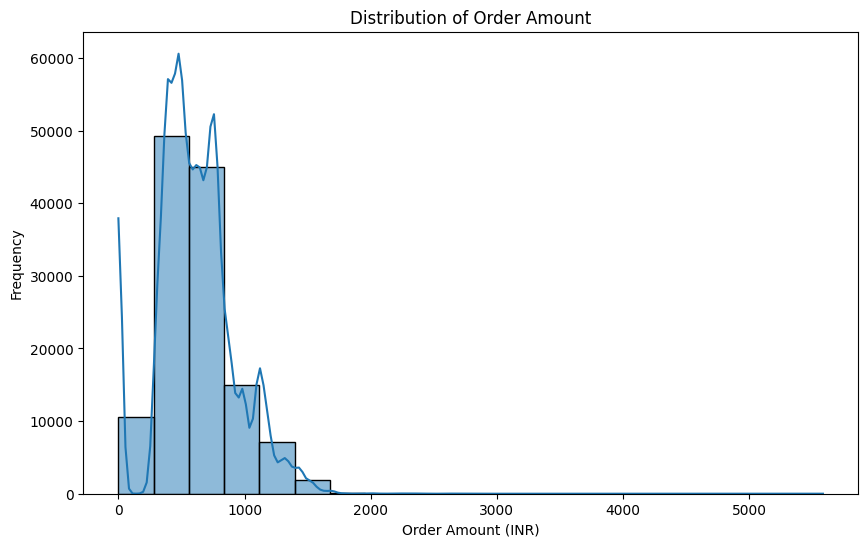

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Create a histogram of orderAmount
plt.figure(figsize=(10, 6))
sns.histplot(amazon['orderAmount (INR)'], bins=20, kde=True)
plt.title('Distribution of Order Amount')
plt.xlabel('Order Amount (INR)')
plt.ylabel('Frequency')
plt.show()


In [10]:
import plotly.express as px

# Create a histogram using Plotly Express
fig = px.histogram(amazon, x='orderAmount (INR)', nbins=20, title='Distribution of Order Amount')
fig.update_xaxes(title_text='Order Amount (INR)')
fig.update_yaxes(title_text='Frequency')
fig.show()


In [11]:
#Data Filtering and Grouping: Depending on your analysis goals, you may need to filter and group your data. Pandas allows you to filter rows and group data using the groupby() function.

In [12]:
amazon['state'].nunique()

70

In [13]:
# Example: Group data by 'state' and calculate total order amount in each state
statewise_sales = amazon.groupby('state')['orderAmount (INR)'].sum().reset_index()
print(statewise_sales)

                 state  orderAmount (INR)
0   ANDAMAN & NICOBAR            158723.9
1       ANDHRA PRADESH          3219833.2
2                  APO                0.0
3                   AR              493.0
4    ARUNACHAL PRADESH            95234.9
..                 ...                ...
65              orissa              597.0
66              punjab             8622.0
67           rajasthan             3946.0
68            rajsthan              521.0
69             unknown            18671.0

[70 rows x 2 columns]


In [14]:
statewise_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              70 non-null     object 
 1   orderAmount (INR)  70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [15]:
# Sort the statewise_sales DataFrame by 'orderAmount (INR)' in descending order
statewise_sales_sorted = statewise_sales.sort_values(by='orderAmount (INR)', ascending=False)

# Select the top 10 states
top_10_states = statewise_sales_sorted.head(10)

# Print the top 10 states with the highest order amounts
print(top_10_states)


             state  orderAmount (INR)
28     MAHARASHTRA         13335536.9
23       KARNATAKA         10481118.6
57       TELANGANA          6916618.2
59   UTTAR PRADESH          6816644.9
56      TAMIL NADU          6515651.9
14           DELHI          4235217.0
24          KERALA          3830229.1
61     WEST BENGAL          3507880.7
1   ANDHRA PRADESH          3219833.2
19         HARYANA          2882093.5


In [16]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              128975 non-null  int64  
 1   date               128975 non-null  object 
 2   shipStatus         128975 non-null  object 
 3   Fulfilment         128975 non-null  object 
 4   serviceLevel       128975 non-null  object 
 5   style              128975 non-null  object 
 6   sku                128975 non-null  object 
 7   productCategory    128975 non-null  object 
 8   size               128975 non-null  object 
 9   asin               128975 non-null  object 
 10  courierShipStatus  128975 non-null  object 
 11  orderQuantity      128975 non-null  int64  
 12  orderAmount (INR)  128975 non-null  float64
 13  city               128975 non-null  object 
 14  state              128975 non-null  object 
 15  zip                128975 non-null  object 
 16  pr

In [17]:
import pandas as pd

# Group data by 'state' and calculate total order quantity and total order amount
statewise_summary = amazon.groupby('state').agg({
    'orderQuantity': 'sum',
    'orderAmount (INR)': 'sum'
}).reset_index()

# Calculate the average amount per quantity
statewise_summary['Avg. Amount per Quantity'] = statewise_summary['orderAmount (INR)'] / statewise_summary['orderQuantity']

# Rename the columns for clarity
statewise_summary.columns = ['state', 'Total Order Quantity', 'Total Order Amount (INR)', 'Avg. Amount per Quantity']

# Sort the DataFrame in descending order by 'Total Order Quantity'
statewise_summary = statewise_summary.sort_values(by='Total Order Quantity', ascending=False)

# Print the statewise summary
print(statewise_summary)


            state  Total Order Quantity  Total Order Amount (INR)  \
28    MAHARASHTRA                 20328                13335536.9   
23      KARNATAKA                 15901                10481118.6   
56     TAMIL NADU                 10412                 6515651.9   
57      TELANGANA                 10253                 6916618.2   
59  UTTAR PRADESH                  9499                 6816644.9   
..            ...                   ...                       ...   
45    Pondicherry                     1                     529.0   
68       rajsthan                     1                     521.0   
42             PB                     1                     399.0   
33      Meghalaya                     0                     921.9   
2             APO                     0                       0.0   

    Avg. Amount per Quantity  
28                656.018147  
23                659.148393  
56                625.782933  
57                674.594577  
59              

In [18]:
statewise_summary.head(12) #top 12 by quantity ordered

,state,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
28,MAHARASHTRA,20328,13335536.9,656.018147
23,KARNATAKA,15901,10481118.6,659.148393
56,TAMIL NADU,10412,6515651.9,625.782933
57,TELANGANA,10253,6916618.2,674.594577
59,UTTAR PRADESH,9499,6816644.9,717.617107
14,DELHI,6156,4235217.0,687.981969
24,KERALA,5813,3830229.1,658.907466
61,WEST BENGAL,5318,3507880.7,659.624050
1,ANDHRA PRADESH,4819,3219833.2,668.153808
18,Gujarat,4149,2728652.9,657.665196


In [19]:
# NO ACCOMODATION OF ALL STATES  so IGNORE THIS
import plotly.express as px

# Assuming you have the statewise_summary DataFrame with the required data
fig = px.bar(statewise_summary, x='state', y='Total Order Amount (INR)', 
             title='Total Sales by State', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})
fig.update_xaxes(title_text='State')
fig.update_yaxes(title_text='Total Sales (INR)')

fig.show()   


In [20]:
import plotly.express as px

# Assuming you have the statewise_summary DataFrame with the required data

fig = px.pie(statewise_summary, names='state', values='Total Order Amount (INR)',
             title='States by Quantity Ordered - Pie Chart', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})

fig.show()

In [21]:
import plotly.express as px

# Assuming you have the statewise_summary DataFrame with the required data
top_12_states_by_quantity = statewise_summary.head(12)

fig = px.bar(top_12_states_by_quantity, x='state', y='Total Order Amount (INR)', 
             title='Top 12 States by Quantity Ordered', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})
fig.update_xaxes(title_text='State')
fig.update_yaxes(title_text='Total Sales (INR)')

fig.show()


In [22]:
import plotly.express as px

# Assuming you have the statewise_summary DataFrame with the required data
top_12_states_by_quantity = statewise_summary.head(12)

fig = px.pie(top_12_states_by_quantity, names='state', values='Total Order Amount (INR)',
             title='Top 12 States by Quantity Ordered & their TOTAL SALES - Pie Chart', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})

fig.show()


In [23]:
import plotly.express as px

top_12_states_by_quantity=statewise_summary.head(12)
# Assuming you have the top_12_states_by_quantity DataFrame
statewise_sales_over_time = amazon[amazon['state'].isin(top_12_states_by_quantity['state'])]
statewise_sales_over_time = statewise_sales_over_time.groupby(['state', 'date'])['orderAmount (INR)'].sum().reset_index()

fig = px.line(statewise_sales_over_time, x='date', y='orderAmount (INR)', color='state',
              title='Total Sales Over Time by State (Top 12 States) - Line Chart', labels={'orderAmount (INR)': 'Total Sales (INR)'})

fig.show()


In [24]:
import pandas as pd

# Group data by 'city' and calculate total order quantity and total order amount
citywise_summary = amazon.groupby('city').agg({
    'orderQuantity': 'sum',
    'orderAmount (INR)': 'sum'
}).reset_index()

# Calculate the average amount per quantity
citywise_summary['Avg. Amount per Quantity'] = citywise_summary['orderAmount (INR)'] / citywise_summary['orderQuantity']

# Rename the columns for clarity
citywise_summary.columns = ['city', 'Total Order Quantity', 'Total Order Amount (INR)', 'Avg. Amount per Quantity']

# Sort the DataFrame in descending order by 'Total Order Quantity'
citywise_summary =citywise_summary.sort_values(by='Total Order Quantity', ascending=False)

# Print the statewise summary
print(citywise_summary)


                         city  Total Order Quantity  Total Order Amount (INR)  \
776                 BENGALURU                 10422                 6849666.9   
2906                HYDERABAD                  7333                 4946034.5   
4795                   MUMBAI                  5650                 3704462.0   
5393                NEW DELHI                  5252                 3613875.8   
1466                  CHENNAI                  4937                 3098746.7   
...                       ...                   ...                       ...   
7269                Sanvordem                     0                     380.0   
4226           Koothattukulam                     0                     385.7   
6783          Rayya, Amritsar                     0                       0.0   
6785                 Redhills                     0                       0.0   
7305  Secunderabad, HYDERABAD                     0                     514.3   

      Avg. Amount per Quant

In [25]:
citywise_summary.head(12) #top 12 by quantity ordered

,city,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
776,BENGALURU,10422,6849666.9,657.231520
2906,HYDERABAD,7333,4946034.5,674.489909
4795,MUMBAI,5650,3704462.0,655.656991
5393,NEW DELHI,5252,3613875.8,688.095164
1466,CHENNAI,4937,3098746.7,627.657829
6158,PUNE,3533,2338518.6,661.907331
3712,KOLKATA,2166,1414978.6,653.268052
2620,GURUGRAM,1734,1221618.9,704.509170
7587,THANE,1539,1004355.3,652.602534
4397,LUCKNOW,1283,933926.9,727.924318


In [26]:
amazon['city'].nunique()

8956

In [27]:
import plotly.express as px

# Assuming you have the statewise_summary DataFrame with the required data
top_12_city_by_quantity = citywise_summary.head(12)

fig = px.bar(top_12_city_by_quantity, x='city', y='Total Order Amount (INR)', 
             title='Top 12 city by Quantity Ordered', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})
fig.update_xaxes(title_text='city')
fig.update_yaxes(title_text='Total Sales (INR)')

fig.show()


In [28]:
import plotly.express as px

# Assuming you have the statewise_summary DataFrame with the required data
top_12_cities_by_quantity = citywise_summary.head(12)

fig = px.pie(top_12_cities_by_quantity, names='city', values='Total Order Amount (INR)',
             title='Top 12 cities by Quantity Ordered - Pie Chart', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})

fig.show()

In [29]:
import plotly.express as px

top_12_cities_by_quantity=citywise_summary.head(12)
# Assuming you have the top_12_cities_by_quantity DataFrame
citywise_sales_over_time = amazon[amazon['city'].isin(top_12_cities_by_quantity['city'])]
citywise_sales_over_time = citywise_sales_over_time.groupby(['city', 'date'])['orderAmount (INR)'].sum().reset_index()

fig = px.line(citywise_sales_over_time, x='date', y='orderAmount (INR)', color='city',
              title='Total Sales Over Time by city (Top 12 cities) - Line Chart', labels={'orderAmount (INR)': 'Total Sales (INR)'})

fig.show()


In [30]:
amazon['promotion'].nunique()

5788

In [31]:
print(amazon['promotion'].head(12))

0                                          no promotion
1     Amazon PLCC Free-Financing Universal Merchant ...
2          IN Core Free Shipping 2015/04/08 23-48-5-108
3                                          no promotion
4                                          no promotion
5          IN Core Free Shipping 2015/04/08 23-48-5-108
6          IN Core Free Shipping 2015/04/08 23-48-5-108
7     Amazon PLCC Free-Financing Universal Merchant ...
8          IN Core Free Shipping 2015/04/08 23-48-5-108
9                                          no promotion
10                                         no promotion
11                                         no promotion
Name: promotion, dtype: object


In [32]:
import pandas as pd

# Group data by 'promotion' and calculate total order quantity and total order amount
promotion_summary = amazon.groupby('promotion').agg({
    'orderQuantity': 'sum',
    'orderAmount (INR)': 'sum'
}).reset_index()

# Calculate the average amount per quantity
promotion_summary['Avg. Amount per Quantity'] = promotion_summary['orderAmount (INR)'] / promotion_summary['orderQuantity']

# Rename the columns for clarity
promotion_summary.columns = ['Promotion', 'Total Order Quantity', 'Total Order Amount (INR)', 'Avg. Amount per Quantity']

# Sort the DataFrame in descending order by 'Avg. Amount per Quantity'
promotion_summary = promotion_summary.sort_values(by='Avg. Amount per Quantity', ascending=False)

# Print the promotion-wise summary
print(promotion_summary)


                                              Promotion  Total Order Quantity  \
353   Amazon PLCC Free-Financing Universal Merchant ...                     1   
4290  Amazon PLCC Free-Financing Universal Merchant ...                     1   
4572  Amazon PLCC Free-Financing Universal Merchant ...                     1   
1998  Amazon PLCC Free-Financing Universal Merchant ...                     1   
4404  Amazon PLCC Free-Financing Universal Merchant ...                     1   
...                                                 ...                   ...   
22    Amazon PLCC Free-Financing Universal Merchant ...                     9   
23    Amazon PLCC Free-Financing Universal Merchant ...                    10   
24    Amazon PLCC Free-Financing Universal Merchant ...                     6   
25    Amazon PLCC Free-Financing Universal Merchant ...                    13   
0     Amazon PLCC Free-Financing Universal Merchant ...                     7   

      Total Order Amount (I

In [33]:
promotion_summary.head(12)

,Promotion,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
353,Amazon PLCC Free-Financing Universal Merchant ...,1,2598.0,2598.0
4290,Amazon PLCC Free-Financing Universal Merchant ...,1,2598.0,2598.0
4572,Amazon PLCC Free-Financing Universal Merchant ...,1,1695.0,1695.0
1998,Amazon PLCC Free-Financing Universal Merchant ...,1,1695.0,1695.0
4404,Amazon PLCC Free-Financing Universal Merchant ...,1,1593.0,1593.0
4066,Amazon PLCC Free-Financing Universal Merchant ...,2,3180.0,1590.0
1293,Amazon PLCC Free-Financing Universal Merchant ...,1,1556.0,1556.0
3775,Amazon PLCC Free-Financing Universal Merchant ...,1,1556.0,1556.0
1547,Amazon PLCC Free-Financing Universal Merchant ...,1,1556.0,1556.0
4520,Amazon PLCC Free-Financing Universal Merchant ...,1,1523.0,1523.0


In [34]:
# as promotion is done by many agencies with many distributors within same company so its not that beneficial to study that in this dataset

In [35]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              128975 non-null  int64  
 1   date               128975 non-null  object 
 2   shipStatus         128975 non-null  object 
 3   Fulfilment         128975 non-null  object 
 4   serviceLevel       128975 non-null  object 
 5   style              128975 non-null  object 
 6   sku                128975 non-null  object 
 7   productCategory    128975 non-null  object 
 8   size               128975 non-null  object 
 9   asin               128975 non-null  object 
 10  courierShipStatus  128975 non-null  object 
 11  orderQuantity      128975 non-null  int64  
 12  orderAmount (INR)  128975 non-null  float64
 13  city               128975 non-null  object 
 14  state              128975 non-null  object 
 15  zip                128975 non-null  object 
 16  pr

In [36]:
amazon['date'].nunique()

91

In [64]:
import pandas as pd

# Group data by 'date' and calculate total order quantity and total order amount
datewise_summary = amazon.groupby('date').agg({
    'orderQuantity': 'sum',
    'orderAmount (INR)': 'sum'
}).reset_index()

# Calculate the average amount per quantity
datewise_summary['Avg. Amount per Quantity'] = datewise_summary['orderAmount (INR)'] / datewise_summary['orderQuantity']

# Rename the columns for clarity
datewise_summary.columns = ['date', 'Total Order Quantity', 'Total Order Amount (INR)', 'Avg. Amount per Quantity']

# Sort the DataFrame in order by 'date'
datewise_summary = datewise_summary.sort_values(by='date', ascending=True)

# Print the datewise summary
print(datewise_summary)

          date  Total Order Quantity  Total Order Amount (INR)  \
0   2022-03-31                   156                  101684.0   
1   2022-04-01                  1319                  865478.9   
2   2022-04-02                  1408                  913101.3   
3   2022-04-03                  1544                 1011763.2   
4   2022-04-04                  1331                  882059.3   
..         ...                   ...                       ...   
86  2022-06-25                   940                  654234.6   
87  2022-06-26                  1122                  773610.3   
88  2022-06-27                  1023                  714125.0   
89  2022-06-28                  1104                  772085.7   
90  2022-06-29                   627                  411530.7   

    Avg. Amount per Quantity  
0                 651.820513  
1                 656.162926  
2                 648.509446  
3                 655.287047  
4                 662.704207  
..                   

In [65]:
datewise_summary.head(15)

,date,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
0,2022-03-31,156,101684.0,651.820513
1,2022-04-01,1319,865478.9,656.162926
2,2022-04-02,1408,913101.3,648.509446
3,2022-04-03,1544,1011763.2,655.287047
4,2022-04-04,1331,882059.3,662.704207
5,2022-04-05,1486,950543.8,639.666083
6,2022-04-06,1439,886985.5,616.390202
7,2022-04-07,1377,909899.8,660.784168
8,2022-04-08,1519,1018617.9,670.584529
9,2022-04-09,1471,972076.8,660.827192


In [39]:
 
import plotly.express as px

fig = px.line(datewise_summary, x='date', y='Total Order Amount (INR)',
              title='Total Order Sales Over Time', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})
fig.show()


In [40]:
import plotly.express as px

fig = px.bar(datewise_summary, x='date', y='Total Order Quantity',
             title='Total Order Quantity Over Time', labels={'Total Order Quantity': 'Quantity'})
fig.show()


In [41]:
import plotly.express as px

fig = px.bar(datewise_summary, x='date', y='Total Order Amount (INR)',
             title='Total Sales Over Time', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})
fig.show()


In [42]:
import plotly.express as px

fig = px.scatter(datewise_summary, x='date', y='Total Order Amount (INR)',
                 title='Total Order Amount or Sales Scatter Plot', labels={'Total Order Amount (INR)': 'Total Sales (INR)'})
fig.show()


In [66]:
datewise_summary.info()
datewise_summary.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      91 non-null     object 
 1   Total Order Quantity      91 non-null     int64  
 2   Total Order Amount (INR)  91 non-null     float64
 3   Avg. Amount per Quantity  91 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.6+ KB


,date,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
0,2022-03-31,156,101684.0,651.820513
1,2022-04-01,1319,865478.9,656.162926
2,2022-04-02,1408,913101.3,648.509446
3,2022-04-03,1544,1011763.2,655.287047
4,2022-04-04,1331,882059.3,662.704207
5,2022-04-05,1486,950543.8,639.666083
6,2022-04-06,1439,886985.5,616.390202
7,2022-04-07,1377,909899.8,660.784168
8,2022-04-08,1519,1018617.9,670.584529
9,2022-04-09,1471,972076.8,660.827192


In [70]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Assuming 'datewise_summary' is the DataFrame containing your dataset
# datewise_summary['date'] = pd.to_datetime(datewise_summary['date'])  # Convert to datetime type

# # Extract year, month, and day
# datewise_summary['year'] = datewise_summary['date'].dt.year
# datewise_summary['month'] = datewise_summary['date'].dt.month
# datewise_summary['day'] = datewise_summary['date'].dt.day

# # Define features and target variable
# X = datewise_summary[['year', 'month', 'day', 'Total Order Quantity', 'Avg. Amount per Quantity']]
# y = datewise_summary['Total Order Amount (INR)']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the Random Forest model
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)

# Save the trained model to a file
# model_filename = 'rf_model.pkl'
# joblib.dump(rf_model, model_filename)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Calculate the Model Score (R-squared)
# model_score = rf_model.score(X_test, y_test)

# # Calculate the Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Display the Model Score and RMSE
# print("Model Score (R-squared):", model_score)
# print("Root Mean Squared Error (RMSE):", rmse)


Model Score (R-squared): 0.7856055178317468
Root Mean Squared Error (RMSE): 92311.39614855597


In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib
import numpy as np

# Assuming 'datewise_summary' is the DataFrame containing your dataset
datewise_summary['date'] = pd.to_datetime(datewise_summary['date'])  # Convert to datetime type

# Extract year, month, and day
datewise_summary['year'] = datewise_summary['date'].dt.year
datewise_summary['month'] = datewise_summary['date'].dt.month
datewise_summary['day'] = datewise_summary['date'].dt.day

# Define features and target variable
X = datewise_summary[['year', 'month', 'day', 'Total Order Quantity', 'Avg. Amount per Quantity']]
y = datewise_summary['Total Order Amount (INR)']

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Save the trained model to a file
model_filename = 'rf_model.pkl'
joblib.dump(rf_model, model_filename)

# Create a date range for the next 45 days
last_date = datewise_summary['date'].max()
next_45_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=45, freq='D')

# Create a DataFrame for the next 45 days
future_data = pd.DataFrame({'date': next_45_days})

# Extract year, month, and day features for the future dates
future_data['year'] = future_data['date'].dt.year
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day

# Add additional columns (e.g., 'Total Order Quantity', 'Avg. Amount per Quantity') with your desired values for the future dates

# Predict 'Total Order Amount (INR)' for the next 45 days using the trained model
future_data['Total Order Amount (INR)'] = rf_model.predict(future_data[['year', 'month', 'day', 'Total Order Quantity', 'Avg. Amount per Quantity']])

# Concatenate the future data with the original 'datewise_summary' DataFrame
updated_dataframe = pd.concat([datewise_summary, future_data])

# Save the updated DataFrame to a new CSV file
updated_dataframe.to_csv('updated_datewise_summary.csv', index=False)


KeyError: "['Total Order Quantity', 'Avg. Amount per Quantity'] not in index"

In [75]:
##################################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'datewise_summary' is the DataFrame containing your dataset
datewise_summary['date'] = pd.to_datetime(datewise_summary['date'])  # Convert to datetime type

# Extract year, month, and day
datewise_summary['year'] = datewise_summary['date'].dt.year
datewise_summary['month'] = datewise_summary['date'].dt.month
datewise_summary['day'] = datewise_summary['date'].dt.day

# Define features and target variable
X = datewise_summary[['year', 'month', 'day', 'Total Order Quantity', 'Avg. Amount per Quantity']]
y = datewise_summary['Total Order Amount (INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'rf_model.pkl'
joblib.dump(rf_model, model_filename)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Model Score (R-squared)
model_score = rf_model.score(X_test, y_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the Model Score and RMSE
print("Model Score (R-squared):", model_score)
print("Root Mean Squared Error (RMSE):", rmse)

Model Score (R-squared): 0.7566155162615484
Root Mean Squared Error (RMSE): 98354.66450947526


In [76]:
########################################## predicting for existing dates- 'datewise_summary_with_predictions.csv'
import pandas as pd
import joblib

# Load the saved Random Forest model
model_filename = 'rf_model.pkl'
rf_model = joblib.load(model_filename)

# Assuming 'datewise_summary' is the DataFrame containing your dataset
datewise_summary['date'] = pd.to_datetime(datewise_summary['date'])  # Convert to datetime type

# Extract year, month, and day
datewise_summary['year'] = datewise_summary['date'].dt.year
datewise_summary['month'] = datewise_summary['date'].dt.month
datewise_summary['day'] = datewise_summary['date'].dt.day

# Define features
X = datewise_summary[['year', 'month', 'day', 'Total Order Quantity', 'Avg. Amount per Quantity']]

# Use the model to make predictions
datewise_summary['Predicted Total Order Amount (INR)'] = rf_model.predict(X)

# Now, the 'Predicted Total Order Amount (INR)' column in 'datewise_summary' contains the model's predictions for your dataset.
# Define the filename for the new CSV file
output_filename = 'datewise_summary_with_predictions.csv'

# Save the updated DataFrame to the new CSV file
datewise_summary.to_csv(output_filename, index=False)


In [83]:
datewise_summary.drop(columns=('Predicted Total Order Amount (INR)'),inplace=True)

In [88]:
################################################### predicting for further dates- 'datewise_summary_further_forecast.csv'
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the saved model
rf_model = joblib.load('rf_model.pkl')

# Get the last available data points (lag values) from datewise_summary
last_data_point = datewise_summary[['year', 'month', 'day', 'Total Order Quantity', 'Avg. Amount per Quantity']].tail(1).values

# Create a DataFrame to store the forecasted values
forecasted_dates = pd.date_range(start=datewise_summary['date'].max() + pd.Timedelta(days=1), periods=45, freq='D')
forecasted_amount = []

# Make predictions for the next 45 days
for i in range(45):
    # Predict Total Order Amount (INR) for the next day
    prediction = rf_model.predict([last_data_point[0]])  # Pass the first element of the last_data_point array
    
    # Append the prediction to the list
    forecasted_amount.append(prediction[0])
    
    # Update last_data_point for the next iteration
    last_data_point = np.array([np.append(last_data_point[0, :-1], prediction)])  # Append the prediction to last_data_point

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'date': forecasted_dates, 'Total Order Amount (INR)': forecasted_amount})

# Concatenate the forecasted values with the original datewise_summary DataFrame
updated_datewise_summary = pd.concat([datewise_summary, forecast_df], ignore_index=True)

# Save the updated DataFrame to a new CSV file
updated_datewise_summary.to_csv('datewise_summary_further_forecast.csv', index=False)




c:\python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\python311\Lib\site-packages\sklearn\b

In [ ]:
#----------------------------------xxxxxxxxxxx-----------------------------------

In [71]:
datewise_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      91 non-null     datetime64[ns]
 1   Total Order Quantity      91 non-null     int64         
 2   Total Order Amount (INR)  91 non-null     float64       
 3   Avg. Amount per Quantity  91 non-null     float64       
 4   year                      91 non-null     int64         
 5   month                     91 non-null     int64         
 6   day                       91 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 5.7 KB


In [72]:
datewise_summary.head(15)

,date,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity,year,month,day
0,2022-03-31,156,101684.0,651.820513,2022,3,31
1,2022-04-01,1319,865478.9,656.162926,2022,4,1
2,2022-04-02,1408,913101.3,648.509446,2022,4,2
3,2022-04-03,1544,1011763.2,655.287047,2022,4,3
4,2022-04-04,1331,882059.3,662.704207,2022,4,4
5,2022-04-05,1486,950543.8,639.666083,2022,4,5
6,2022-04-06,1439,886985.5,616.390202,2022,4,6
7,2022-04-07,1377,909899.8,660.784168,2022,4,7
8,2022-04-08,1519,1018617.9,670.584529,2022,4,8
9,2022-04-09,1471,972076.8,660.827192,2022,4,9


In [ ]:
#-------------------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx-----------------------------------------------------

In [62]:
datewise_summary.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [58]:
datewise_summary.head(12)

,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
date,,,
2022-03-31,156,101684.0,651.820513
2022-04-01,1319,865478.9,656.162926
2022-04-02,1408,913101.3,648.509446
2022-04-03,1544,1011763.2,655.287047
2022-04-04,1331,882059.3,662.704207
2022-04-05,1486,950543.8,639.666083
2022-04-06,1439,886985.5,616.390202
2022-04-07,1377,909899.8,660.784168
2022-04-08,1519,1018617.9,670.584529


In [50]:
#datewise_summary.sort_values(by='date', inplace=True)  --its creating lag1 and lag2 columns in 'datewise_summary' dataframe

In [59]:
datewise_summary.head(12)

,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
date,,,
2022-03-31,156,101684.0,651.820513
2022-04-01,1319,865478.9,656.162926
2022-04-02,1408,913101.3,648.509446
2022-04-03,1544,1011763.2,655.287047
2022-04-04,1331,882059.3,662.704207
2022-04-05,1486,950543.8,639.666083
2022-04-06,1439,886985.5,616.390202
2022-04-07,1377,909899.8,660.784168
2022-04-08,1519,1018617.9,670.584529


Model Score (R-squared): 0.7722089733003624
Root Mean Squared Error (RMSE): 95151.75952118808


In [ ]:
#forecast_df.info()
#datewise_summary.info()

forecast_df.head(15)

,Date,Forecasted Sales (INR)
2022-06-11,2022-06-29,786908.892855
2022-06-12,2022-06-30,786466.535996
2022-06-13,2022-07-01,786450.076159
2022-06-14,2022-07-02,786449.463699
2022-06-15,2022-07-03,786449.440909
2022-06-16,2022-07-04,786449.440061
2022-06-17,2022-07-05,786449.440030
2022-06-18,2022-07-06,786449.440029
2022-06-19,2022-07-07,786449.440029
2022-06-20,2022-07-08,786449.440029


In [ ]:
datewise_summary.head(15)

,Total Order Quantity,Total Order Amount (INR),Avg. Amount per Quantity
date,,,
2022-03-31,156,101684.0,651.820513
2022-04-01,1319,865478.9,656.162926
2022-04-02,1408,913101.3,648.509446
2022-04-03,1544,1011763.2,655.287047
2022-04-04,1331,882059.3,662.704207
2022-04-05,1486,950543.8,639.666083
2022-04-06,1439,886985.5,616.390202
2022-04-07,1377,909899.8,660.784168
2022-04-08,1519,1018617.9,670.584529


In [ ]:
pip install Cython


  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/ea/8f/216de5d7bede3e26a7131b427a8aadade032f03f9c8ee88792def02e2cf4/Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
    --------------------------------------- 0.0/2.8 MB 326.8 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.8 MB 939.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.8 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/2.8 MB 1.2 MB/s eta 0:00:03
   -------- ------------------------------- 0.6/2.8 MB 2.0 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 2.4 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [ ]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming datewise_summary has a datetime index and columns as described
# Make sure to set the frequency of the datetime index appropriately

# Rename the columns as required by Prophet (ds for date and y for the target variable)
data = datewise_summary.rename(columns={'date': 'ds', 'Total Order Amount (INR)': 'y'})

# Create and initialize the Prophet model
model = Prophet()

# Fit the model to your data
model.fit(data)

# Specify the number of days you want to forecast into the future
forecast_days = 45

# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=forecast_days)

# Generate forecasts
forecast = model.predict(future)

# Plot the historical and forecasted data
fig = model.plot(forecast)
plt.title('Total Order Amount Forecast (INR)')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.show()

# Extract the forecasted values for the relevant period
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Rename the columns for clarity
forecasted_values.columns = ['Date', 'Forecasted Sales (INR)', 'Lower Bound', 'Upper Bound']

# Merge the forecasted values and actual data based on the 'Date' column
merged_df = pd.merge(forecasted_values, data[['ds', 'y']], on='Date', how='inner')
merged_df.columns = ['Date', 'Forecasted Sales (INR)', 'Lower Bound', 'Upper Bound', 'Actual Sales (INR)']

# Calculate R-squared (R2)
r2 = r2_score(merged_df['Actual Sales (INR)'], merged_df['Forecasted Sales (INR)'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['Actual Sales (INR)'], merged_df['Forecasted Sales (INR)'])

print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")


ModuleNotFoundError: No module named 'fbprophet'